<h2 align = "right">学院：计算机学院&emsp;学号：3120191079&emsp;姓名：周泳宇</h2>

# 互评作业2: 频繁模式与关联规则挖掘

## 本数据集由许多关于葡萄酒的点评构成，这里将分析红酒产地country与品种variety的关系。

## 1.对数据集进行处理，转换成适合进行关联规则挖掘的形式

### 读取数据集

In [1]:
import pandas as pd

In [66]:
wine_df = pd.read_csv("winemag-data_first150k.csv")

In [15]:
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### 将数据转换成多条事务，适合于频繁项挖掘

In [16]:
from tqdm import tqdm

transactions = []
for index, row in tqdm(wine_df.iterrows()):
    transactions += [(row['country'], row['variety'])]

transactions[:20]

150930it [00:19, 7656.00it/s]


[('US', 'Cabernet Sauvignon'),
 ('Spain', 'Tinta de Toro'),
 ('US', 'Sauvignon Blanc'),
 ('US', 'Pinot Noir'),
 ('France', 'Provence red blend'),
 ('Spain', 'Tinta de Toro'),
 ('Spain', 'Tinta de Toro'),
 ('Spain', 'Tinta de Toro'),
 ('US', 'Pinot Noir'),
 ('US', 'Pinot Noir'),
 ('Italy', 'Friulano'),
 ('US', 'Pinot Noir'),
 ('US', 'Pinot Noir'),
 ('France', 'Tannat'),
 ('US', 'Pinot Noir'),
 ('US', 'Chardonnay'),
 ('US', 'Cabernet Sauvignon'),
 ('Spain', 'Tempranillo'),
 ('France', 'Malbec'),
 ('US', 'Pinot Noir')]

## 2.找出频繁模式（采用Apriori算法，support>0.03，confidence>0.1）

```
Aprior算法流程
  输入：数据集合D，支持度阈值α
  输出：最大的频繁k项集
  1）扫描整个数据集，得到所有出现过的数据，作为候选频繁1项集。k=1，频繁0项集为空集。
　2）挖掘频繁k项集
　   a) 扫描数据计算候选频繁k项集的支持度
     b) 去除候选频繁k项集中支持度低于阈值的数据集,得到频繁k项集。如果得到的频繁k项集为空，则直接返回频繁k-1项集的集合作为算法结果，算法结束。如果得到的频繁k项集只有一项，则直接返回频繁k项集的集合作为算法结果，算法结束。
     c) 基于频繁k项集，连接生成候选频繁k+1项集。
  3） 令k=k+1，转入步骤2。
```

In [17]:
from efficient_apriori import apriori

itemsets, rules = apriori(transactions, min_support=0.03,  min_confidence=0.1)

### 频繁模式如下所示：所有的频繁k项集已在下面的字典中列出

In [23]:
itemsets

{1: {('US',): 62397,
  ('Cabernet Sauvignon',): 12800,
  ('Spain',): 8268,
  ('Sauvignon Blanc',): 6320,
  ('Pinot Noir',): 14291,
  ('France',): 21098,
  ('Italy',): 23478,
  ('Chardonnay',): 14482,
  ('Syrah',): 5825,
  ('Red Blend',): 10062,
  ('Riesling',): 5524,
  ('Argentina',): 5631,
  ('Australia',): 4957,
  ('Portugal',): 5322,
  ('Chile',): 5816,
  ('Bordeaux-style Red Blend',): 7347,
  ('Merlot',): 5070},
 2: {('Cabernet Sauvignon', 'US'): 9178,
  ('Pinot Noir', 'US'): 10340,
  ('Chardonnay', 'US'): 8127,
  ('Bordeaux-style Red Blend', 'France'): 4960}}

## 3.导出关联规则，计算其支持度和置信度

In [44]:
for rule in sorted(rules, key=lambda rule: rule.lift):
#     print(dir(rule))
#     print(rule)
    print("关联规则：" + "{" + rule.lhs[0] + "}" + " -> " + "{" + rule.rhs[0] + "}" + "\t" + 
         "支持度：" + str(rule.support) + "\t" + "置信度：" + str(rule.confidence))

关联规则：{US} -> {Chardonnay}	支持度：0.05384615384615385	置信度：0.13024664647338816
关联规则：{Chardonnay} -> {US}	支持度：0.05384615384615385	置信度：0.5611793951111725
关联规则：{US} -> {Cabernet Sauvignon}	支持度：0.060809646856158486	置信度：0.14709040498741927
关联规则：{Cabernet Sauvignon} -> {US}	支持度：0.060809646856158486	置信度：0.71703125
关联规则：{US} -> {Pinot Noir}	支持度：0.06850858013648711	置信度：0.16571309518085806
关联规则：{Pinot Noir} -> {US}	支持度：0.06850858013648711	置信度：0.723532293051571
关联规则：{France} -> {Bordeaux-style Red Blend}	支持度：0.03286291658384682	置信度：0.23509337377950518
关联规则：{Bordeaux-style Red Blend} -> {France}	支持度：0.03286291658384682	置信度：0.6751054852320675


## 4.使用Lift、Kulc系数对规则进行评价

### 4.1 相关性系数Lift
#### 对于规则A—>B或者B—>A，lift(A,B)=P(A交B)/(P(A)*P(B))，如果lift(A,B)>1表示A、B呈正相关，lift(A,B)<1表示A、B呈负相关，lift(A,B)=1表示A、B不相关（独立）。

In [45]:
for rule in sorted(rules, key=lambda rule: rule.lift):
#     print(dir(rule))
#     print(rule)
    print("关联规则：" + "{" + rule.lhs[0] + "}" + " -> " + "{" + rule.rhs[0] + "}" + "\t" + 
         "相关性系数Lift：" + str(rule.lift))

关联规则：{US} -> {Chardonnay}	相关性系数Lift：1.357417922402187
关联规则：{Chardonnay} -> {US}	相关性系数Lift：1.357417922402187
关联规则：{US} -> {Cabernet Sauvignon}	相关性系数Lift：1.7344027206836867
关联规则：{Cabernet Sauvignon} -> {US}	相关性系数Lift：1.7344027206836867
关联规则：{US} -> {Pinot Noir}	相关性系数Lift：1.7501278745816882
关联规则：{Pinot Noir} -> {US}	相关性系数Lift：1.7501278745816882
关联规则：{France} -> {Bordeaux-style Red Blend}	相关性系数Lift：4.829541704714947
关联规则：{Bordeaux-style Red Blend} -> {France}	相关性系数Lift：4.829541704714947


#### 可以看到，关联规则{Bordeaux-style Red Blend} -> {France}的相关性系数较高：说明品种Bordeaux-style Red Blend与产地France存在较大的关联关系，可以通过原始数据集来验证一下，如下所示（可以看出，法国的确比较多）：

In [46]:
wine_df[wine_df['variety'] == 'Bordeaux-style Red Blend'].sample(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
25804,25804,France,A wine that suffers from high toast and not en...,NaN,86,30.0,Bordeaux,Lalande de Pomerol,NaN,Bordeaux-style Red Blend,Château de Bel-Air
110608,110608,France,"90-92 Barrel sample. As often, Magdelaine is a...",Barrel sample,91,NaN,Bordeaux,Saint-Émilion,NaN,Bordeaux-style Red Blend,Château Magdelaine
21242,21242,France,89-91. Barrel sample. This wine has a classic ...,Barrel Sample,90,NaN,Bordeaux,Pomerol,NaN,Bordeaux-style Red Blend,Château La Grave à Pomerol
75487,75487,France,"Powerful, rich and dense, this has tannins and...",Vieilles Vignes,90,11.0,Bordeaux,Bordeaux Supérieur,NaN,Bordeaux-style Red Blend,Château Sainte Marie
100735,100735,France,"At first taste, the tannins dominate. Then fre...",NaN,87,20.0,Bordeaux,Médoc,NaN,Bordeaux-style Red Blend,Château Ramafort
85570,85570,US,This is a blend of Merlot and Cabernet Sauvign...,Hossfeld Coliseum,87,75.0,California,Napa Valley,Napa,Bordeaux-style Red Blend,Carter
35045,35045,US,This Coda displays fresh and bright raspberry ...,Coda,89,25.0,Washington,Red Mountain,Columbia Valley,Bordeaux-style Red Blend,Cadence
150765,150765,Chile,"A dense bouquet of dark cherries, plum, earth,...",NaN,93,87.0,Puente Alto,NaN,NaN,Bordeaux-style Red Blend,Almaviva
35276,35276,US,"This blend of 45% Merlot, 32% Cabernet Franc a...",Detour,84,25.0,Virginia,Virginia,NaN,Bordeaux-style Red Blend,Hume
92953,92953,France,"A dense, beautifully structured wine. It shows...",NaN,96,90.0,Bordeaux,Saint-Julien,NaN,Bordeaux-style Red Blend,Château Léoville Barton


#### 绘制直方图进一步验证：

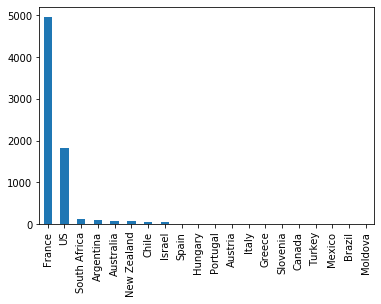

In [48]:
wine_df[wine_df['variety'] == 'Bordeaux-style Red Blend']['country'].value_counts().plot(kind='bar')

### 4.2 Kulc系数
#### Kulc系数就是对两个置信度做一个平均处理：kulc(A,B)=(confidence(A—>B)+confidence(B—>A))/2 

In [54]:
res = []
for rule1 in sorted(rules, key=lambda rule: rule.lift):
    conf1 = rule1.confidence
    for rule2 in sorted(rules, key=lambda rule: rule.lift):
        if rule2.lhs[0] == rule1.rhs[0] and rule2.rhs[0] == rule1.lhs[0]:
            conf2 = rule2.confidence
    kulc = (conf1 + conf2) / 2
    res.append("关联规则：" + "{" + rule1.lhs[0] + "}" + " -> " + "{" + rule1.rhs[0] + "}    " + 
         "Kulc系数：" + str(kulc))

res

['关联规则：{US} -> {Chardonnay}    Kulc系数：0.34571302079228033',
 '关联规则：{Chardonnay} -> {US}    Kulc系数：0.34571302079228033',
 '关联规则：{US} -> {Cabernet Sauvignon}    Kulc系数：0.43206082749370966',
 '关联规则：{Cabernet Sauvignon} -> {US}    Kulc系数：0.43206082749370966',
 '关联规则：{US} -> {Pinot Noir}    Kulc系数：0.4446226941162145',
 '关联规则：{Pinot Noir} -> {US}    Kulc系数：0.4446226941162145',
 '关联规则：{France} -> {Bordeaux-style Red Blend}    Kulc系数：0.4550994295057863',
 '关联规则：{Bordeaux-style Red Blend} -> {France}    Kulc系数：0.4550994295057863']

## 5.对挖掘结果进行分析

### 如在上一部分所示，通过Lift系数，已经对规则{Bordeaux-style Red Blend} -> {France}进行了分析和验证，类似的，规则{Pinot Noir} -> {US}和{Cabernet Sauvignon} -> {US}的Lift系数也较大，说明这两个葡萄酒品种极有可能来自于US，最后，规则{Chardonnay} -> {US}的Lift系数为1.357417922402187，比较接近1，说明品种Chardonnay与US成正相关关系，但可能关联性并没有那么强。

## 6.可视化展示

In [63]:
import matplotlib.pyplot as plt

def plot_bar(rules, data, title):
    plt.title(title)
    plt.xticks(range(len(data)),rules,rotation=90)
    plt.bar(range(len(data)), data, color = 'B')
    plt.show()

def visualization(big_rule_list):
    rules = []
    conf = []
    support = []
    lift = []
    kulc = []
    for i in range(len(big_rule_list)):
        rule = big_rule_list[i][0]
        rules.append(rule)
        conf.append(big_rule_list[i][1])
        support.append(big_rule_list[i][2])
        lift.append(big_rule_list[i][3])
        kulc.append(big_rule_list[i][4])
    plot_bar(rules, support, 'rule-support figure')
    plot_bar(rules, conf, 'rule-confidence figure')
    plot_bar(rules, lift, 'rule-lift figure')
    plot_bar(rules, kulc, 'rule-kulc figure')

In [64]:
big_rule_list = []

for rule1 in sorted(rules, key=lambda rule: rule.lift):
    conf1 = rule1.confidence
    for rule2 in sorted(rules, key=lambda rule: rule.lift):
        if rule2.lhs[0] == rule1.rhs[0] and rule2.rhs[0] == rule1.lhs[0]:
            conf2 = rule2.confidence
    kulc = (conf1 + conf2) / 2
    big_rule_list.append(["{" + rule1.lhs[0] + "}" + "=>" + "{" + rule1.rhs[0] + "}", rule1.confidence, 
                          rule1.support, rule1.lift, kulc])

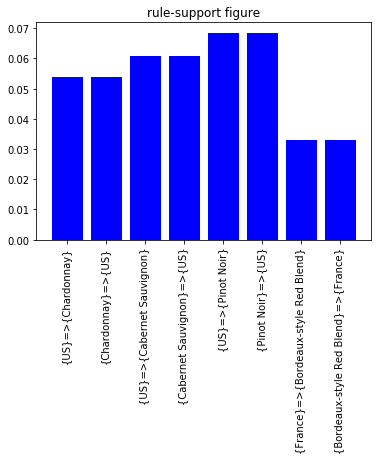

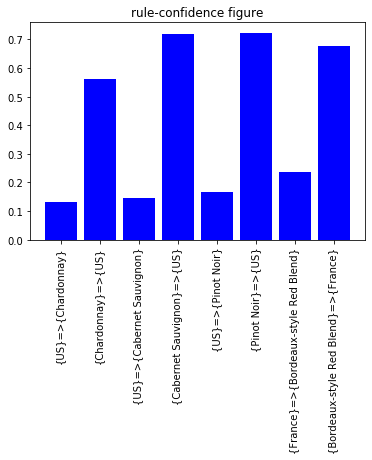

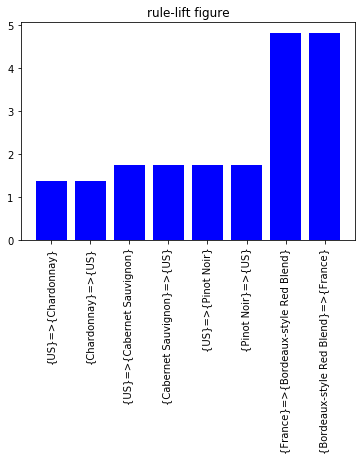

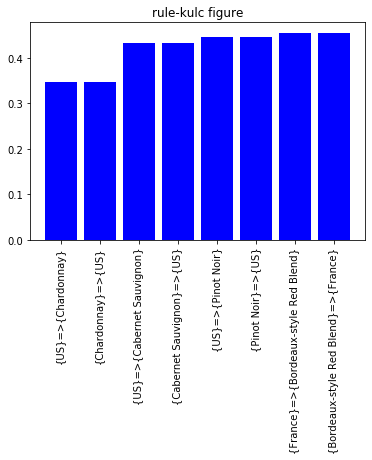

In [65]:
visualization(big_rule_list)